# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_list = []
clouds= []
countries = []
dates = []
humidities = []
lat = []
lon = []
max_temps = []
wind_speeds = []
sets = 1
record = 0

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        record+=1
        #Sleep for a minute 
        if record == 50:
            time.sleep(65)
            record = 0
            sets+=1
        
        url = f"{base_url}q={city}&appid={api_key}&units={units}"
        response = requests.get(url).json()
        
        city_list.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f"Processing Record {record} of Set {sets} | {response['name']}")
        
    except KeyError:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Yellowknife
City not found. Skipping...
Processing Record 3 of Set 1 | Albany
Processing Record 4 of Set 1 | Bodden Town
Processing Record 5 of Set 1 | Madang
Processing Record 6 of Set 1 | Bethel
City not found. Skipping...
Processing Record 8 of Set 1 | Geraldton
City not found. Skipping...
Processing Record 10 of Set 1 | Sao Jose de Ribamar
Processing Record 11 of Set 1 | Fortuna
Processing Record 12 of Set 1 | Ushuaia
Processing Record 13 of Set 1 | Barrow
Processing Record 14 of Set 1 | Ukiah
Processing Record 15 of Set 1 | High Rock
Processing Record 16 of Set 1 | Port Elizabeth
Processing Record 17 of Set 1 | Bredasdorp
Processing Record 18 of Set 1 | Atuona
City not found. Skipping...
Processing Record 20 of Set 1 | Kurilsk
Processing Record 21 of Set 1 | Agadez
Processing Record 22 of Set 1 | Sal Rei
Processing Record 23 of Set 1 | Saint-Philippe
Processing Record 24 of Set 1 | Pevek
Processi

Processing Record 9 of Set 5 | Guadalupe y Calvo
Processing Record 10 of Set 5 | Bued
Processing Record 11 of Set 5 | Zyryanka
City not found. Skipping...
Processing Record 13 of Set 5 | Rantepao
Processing Record 14 of Set 5 | Morondava
Processing Record 15 of Set 5 | Kununurra
Processing Record 16 of Set 5 | Dunedin
Processing Record 17 of Set 5 | Staryy Nadym
Processing Record 18 of Set 5 | Kerteminde
Processing Record 19 of Set 5 | Cidreira
Processing Record 20 of Set 5 | Saskylakh
Processing Record 21 of Set 5 | New Norfolk
Processing Record 22 of Set 5 | Narsaq
Processing Record 23 of Set 5 | Vila Velha
Processing Record 24 of Set 5 | Mount Isa
Processing Record 25 of Set 5 | Sao Gabriel da Cachoeira
Processing Record 26 of Set 5 | Adamas
Processing Record 27 of Set 5 | Kutum
Processing Record 28 of Set 5 | Havelock
Processing Record 29 of Set 5 | Cooma
Processing Record 30 of Set 5 | Podgornoye
Processing Record 31 of Set 5 | Richards Bay
Processing Record 32 of Set 5 | Qandala


Processing Record 15 of Set 9 | Santiago
Processing Record 16 of Set 9 | Gbarnga
Processing Record 17 of Set 9 | Eureka
Processing Record 18 of Set 9 | Aksarka
City not found. Skipping...
Processing Record 20 of Set 9 | Henties Bay
Processing Record 21 of Set 9 | Chiredzi
Processing Record 22 of Set 9 | Mandalgovi
Processing Record 23 of Set 9 | Sao Filipe
Processing Record 24 of Set 9 | Nelson Bay
City not found. Skipping...
Processing Record 26 of Set 9 | Vilhena
City not found. Skipping...
Processing Record 28 of Set 9 | College
Processing Record 29 of Set 9 | Turukhansk
Processing Record 30 of Set 9 | Ixtapa
Processing Record 31 of Set 9 | Hambantota
Processing Record 32 of Set 9 | Thinadhoo
Processing Record 33 of Set 9 | Petropavlovsk-Kamchatskiy
Processing Record 34 of Set 9 | Faanui
Processing Record 35 of Set 9 | Safford
Processing Record 36 of Set 9 | Algiers
Processing Record 37 of Set 9 | Kirensk
Processing Record 38 of Set 9 | Beringovskiy
Processing Record 39 of Set 9 | G

Processing Record 19 of Set 13 | Tuatapere
Processing Record 20 of Set 13 | Zatoka
Processing Record 21 of Set 13 | Etchoropo
-----------------------------
Data Retrieval Complete
-----------------------------


In [108]:
#Make dictionary to hold all relevant info
weather_info = {"City": city_list,
                "Cloudiness": clouds,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": lat,
                "Lng": lon,
                "Max Temp": max_temps,
                "Wind Speed": wind_speeds}

#Make weather dataframe
weather_df = pd.DataFrame(weather_info)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
#Output dataframe to csv file 
weather_df.to_csv(output_data_file, index = False, header = True)

weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [110]:
#Display preview of dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,75,CA,1551309480,65,62.45,-114.38,8.60,12.75
1,Albany,90,US,1551311019,78,42.65,-73.75,17.01,6.93
2,Bodden Town,20,KY,1551310204,74,19.28,-81.25,82.40,6.93
3,Madang,0,PG,1551311835,90,-5.21,145.81,81.10,3.74
4,Bethel,90,US,1551308160,69,60.79,-161.76,39.20,25.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
#Function to make the scatter plot comparing latitude and weather conditions
def weather_plot_by_lat(y_axis, title, y_label, x_label = "Latitude"):
    plt.scatter(weather_df['Lat'], y_axis, marker = 'o',edgecolors="black",alpha = 0.7)
    date_of_analysis = time.strftime("%m/%d/%Y")
    plt.title(f"{title} ({date_of_analysis})")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()


#### Latitude vs. Temperature Plot

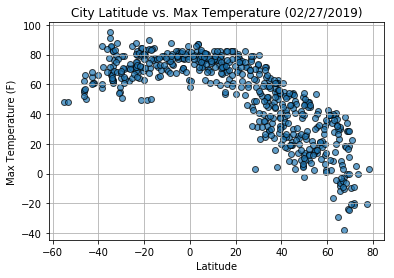

In [111]:
#Create plot
weather_plot_by_lat(weather_df['Max Temp'], "City Latitude vs. Max Temperature","Max Temperature (F)")

#Save figure
plt.savefig("output_data/Latitude_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


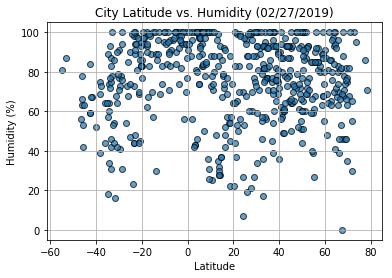

In [112]:
#Create plot
weather_plot(weather_df['Humidity'], "City Latitude vs. Humidity", "Humidity (%)")

#Save figure
plt.savefig("output_data/Latitude_vs_Humidity.png")
#lookup = weather_df.loc[weather_df['Humidity'] > 100, : ]
#lookup


#### Latitude vs. Cloudiness Plot

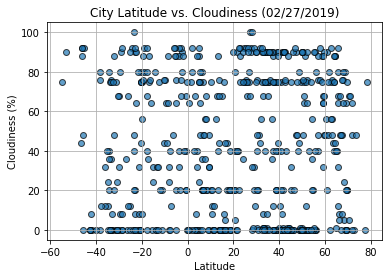

In [113]:
weather_plot(weather_df['Cloudiness'], "City Latitude vs. Cloudiness", "Cloudiness (%)")
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

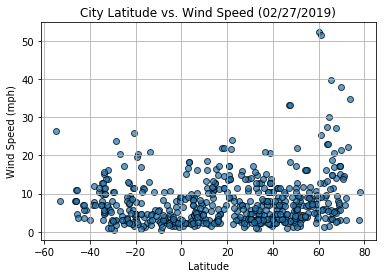

In [114]:
weather_plot(weather_df['Wind Speed'], "City Latitude vs. Wind Speed", "Wind Speed (mph)")
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")